
**<font size="6"> CUSTOMER CHURN PREDICTION </font>**


---

<font size="5"> BUSINESS UNDERSTANDING </font>

---

### Problem statement 

Customer churn refers to the loss of customers over a certain period of time. Companies should be  very aware of customer churn because it directly *impacts their revenue*. When customers leave, the company loses not only their current business, but also the potential future business that the customer could have generated. Additionally, acquiring new customers is often more *expensive than retaining existing ones, so reducing churn can lead to significant cost savings*. Monitoring and reducing customer churn is therefore an important strategy for companies to maintain and grow their customer base, and ultimately, their revenue.By understanding the reasons behind customer churn and taking steps to retain customers, companies can improve their customer satisfaction, build customer loyalty, and ultimately, grow their business.

> **An Example of poor customer experience that cost the company:** **Blockbuster** is an example of a company that failed to address customer churn and ultimately collapsed. **Blockbuster** was once a dominant player in the video rental industry, but as technology changed and customers increasingly sought more convenient ways to watch movies, the company failed to adapt. Competitors like **Netflix** offered online streaming, while Blockbuster stuck to its traditional brick-and-mortar model and relied on late fees to drive revenue.
As a result, customers began leaving Blockbuster in droves, opting for more convenient and cost-effective options. Despite numerous attempts to pivot and compete with Netflix, Blockbuster was unable to stem the tide of customer churn and ultimately filed for bankruptcy in 2010. This serves as a cautionary tale for companies that ignore the importance of addressing customer churn and failing to adapt to changing market conditions.

### Main objective

&#9677; Inline with the importance of preserving existing customers, the **main objective if this project is to come up with  a predictive model that will be able to flag customers who are likely to churn inorder to have targeted mitigating actions focused on them inorder to prevent them from churning**.

### Metric for Success 

&#9677; This project will be considered a success if **prediction accuracy of the model is above 90%** and **recall score is above 75%**

---

<font size="5"> DATA UNDERSTANDING </font>

---

This dataset contains **3333 instances and 21 columns**. Columns contain different information on customers such as 'state', 'account length', 'area code', 'phone number','international plan', 'voice mail plan', 'number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls', 'churn (target)'

## Reading in the data 

In [15]:
# importing all the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import joblib

In [16]:
# reading in the dataset and previewing the first five rows 

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
# Previewing the last five rows of the dataset 

df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [18]:
# checking the dimensions of the dataset 

df.shape

(3333, 21)

## Data cleaning and wrangling 

Data wrangling and cleaning is an important step in data science because it is the process of transforming raw, untidy data into a structured and usable format for analysis. The raw data that is collected from various sources is often messy and contains errors, inconsistencies, and missing values, which can compromise the accuracy of results and lead to incorrect insights. Data wrangling and cleaning helps to identify and correct these issues, ensuring that the data is high-quality and reliable. This in turn helps to ensure that the data is ready for analysis, visualization, and modeling, leading to more accurate and trustworthy results. 
In this section, emphasis will be given to :

 &#9677; Checking and Dealing with missing values 
 
 
 &#9677; Checking for and Dealing with duplicated values 
 
 
 &#9677; Checking if dataset has appropriate(expected) data types for each of the columns 
    
   
 &#9677; Checking dealing with outliers 
    

In [19]:
# making a copy of the dataset

df_copy = df.copy()

In [20]:
# checking for any missing values 

df_copy.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset **does not have any missing values** for any of the columns 

In [21]:
# Checking if the dataset has duplicated values

df_copy.duplicated().sum()

0

Yet again, the dataset **does not contain any duplicates**

In [22]:
# checking of columns have the expected data types 

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

All other data types expect the column `area code` have the expected data types. The column `area code` needs to be converted to 'object type'

In [23]:
# creating a new column cat_area_code as an object

df_copy['cat_area_code'] = df_copy['area code'].astype('object')

Additionally, we will recode the `state` column into different `region` such as west, southwest, midwest, southeast and northeast. This is because having few categories in can help simplify the data and reduce the number of dimensions in the one-hot encoding, making it easier to work with. This can also help **avoid overfitting, as having too many dimensions in the one-hot encoding can lead to overfitting on the training data as the model with fit to noise** as there will be way too many categories. 

In [24]:
# creating a dictionary with the different states recoded into different regions

regions = {'WA': 'West', 'CA': 'West', 'OR': 'West', 'MT': 'West', 'ID': 'West', 'WY': 'West', 'UT': 'West', 'CO': 'West', 'AK': 'West', 'HI': 'West', 'NV':'West',
           'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest', 'TX': 'Southwest',
           'ND': 'Midwest', 'MN': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest', 'MI': 'Midwest',
           'AR': 'Southeast', 'LA': 'Southeast', 'MS': 'Southeast', 'AL': 'Southeast', 'GA': 'Southeast', 'SC': 'Southeast', 'FL': 'Southeast', 'NC': 'Southeast', 'VA': 'Southeast', 'DC': 'Southeast', 'KY': 'Southeast', 'WV': 'Southeast', 'TN': 'Southeast',
           'PA': 'Northeast', 'NY': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'CT': 'Northeast', 'RI': 'Northeast', 'DE': 'Northeast', 'MD': 'Northeast', 'NJ': 'Northeast'}

In [25]:
# mapping state to the region dictionary and confirming the new column created 

df_copy['region'] = df_copy['state'].map(regions)

df_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,cat_area_code,region
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,415,Midwest
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,415,Midwest
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,415,Northeast
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,408,Midwest
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,415,Southwest


The following columns will be **dropped `state` and `area code` ( as we have already created useful columns from them)**

In [26]:
df_copy.drop(['state','area code'], axis=1, inplace= True)

In [27]:
# checking for the summary of the dataset

df_copy.describe(include='all')

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,cat_area_code,region
count,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.0,3333
unique,NaN,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,5
top,NaN,334-5634,no,no,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,415.0,Southeast
freq,NaN,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,1655.0,845
mean,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,...,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN,NaN,NaN
std,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,...,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,...,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN,NaN,NaN
50%,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,...,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN,NaN,NaN
75%,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,...,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN,NaN,NaN


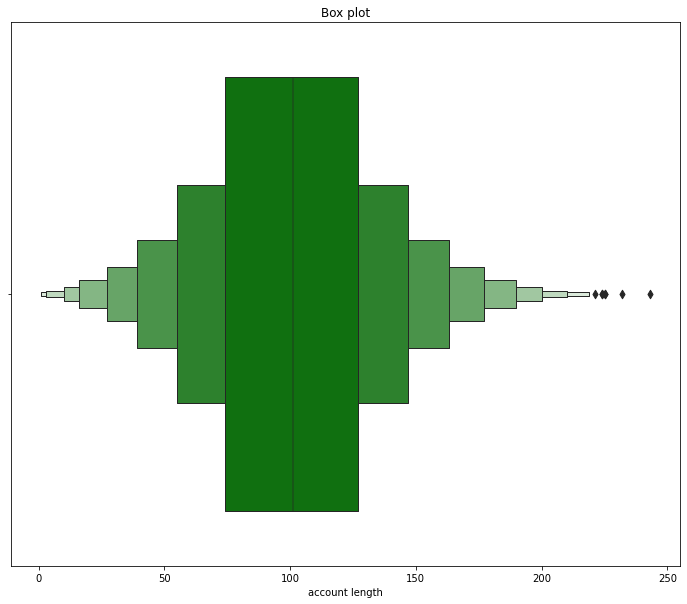

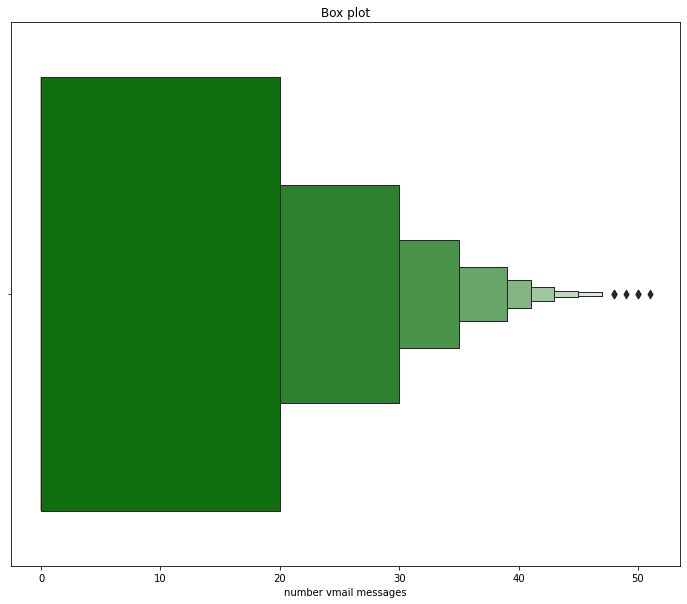

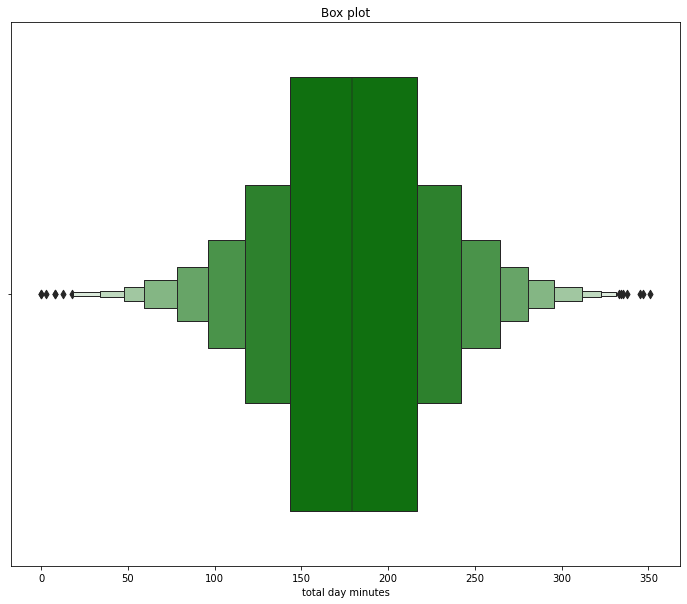

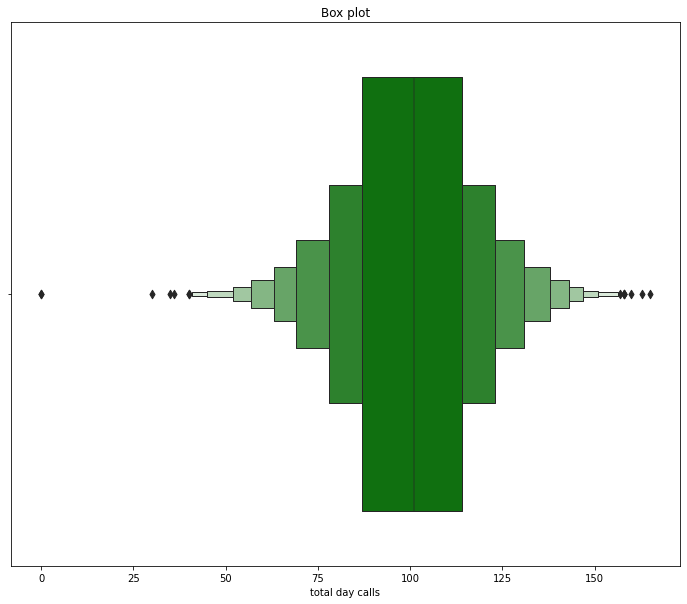

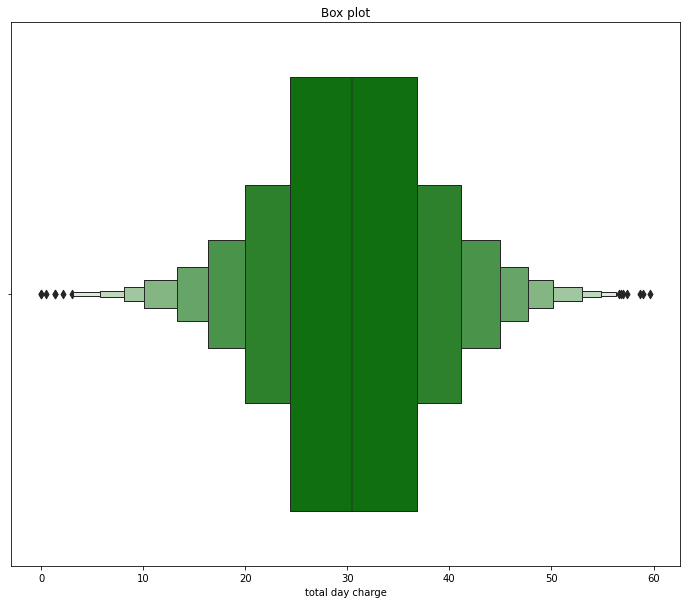

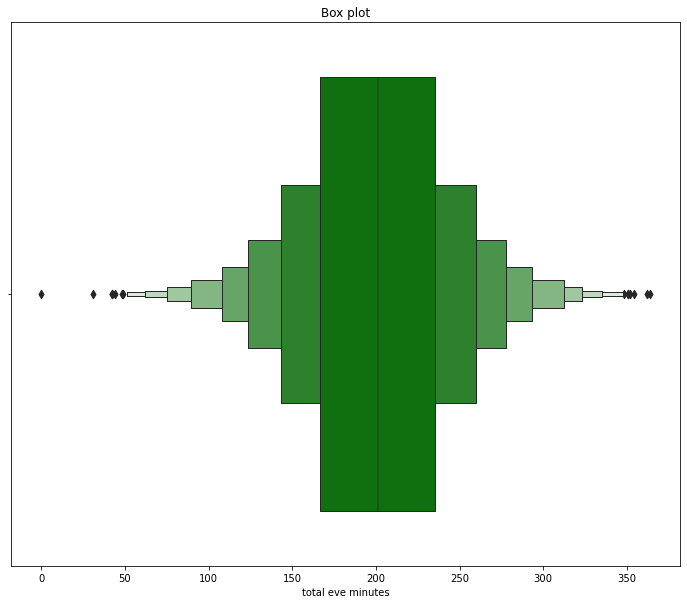

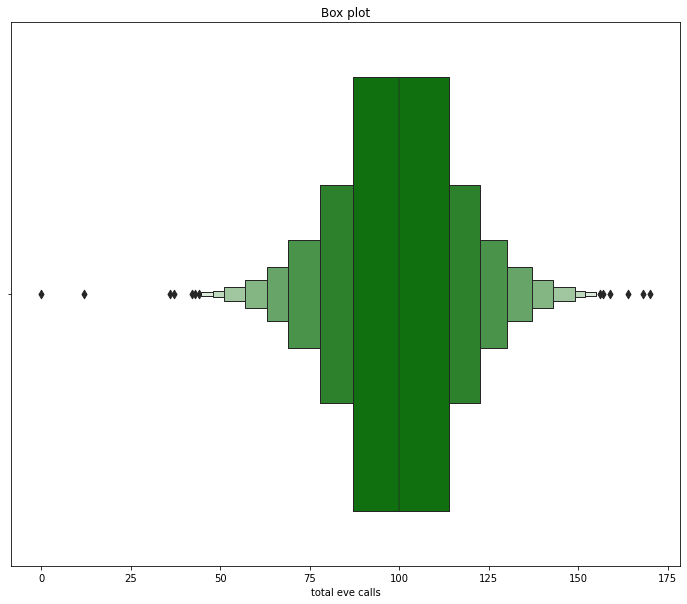

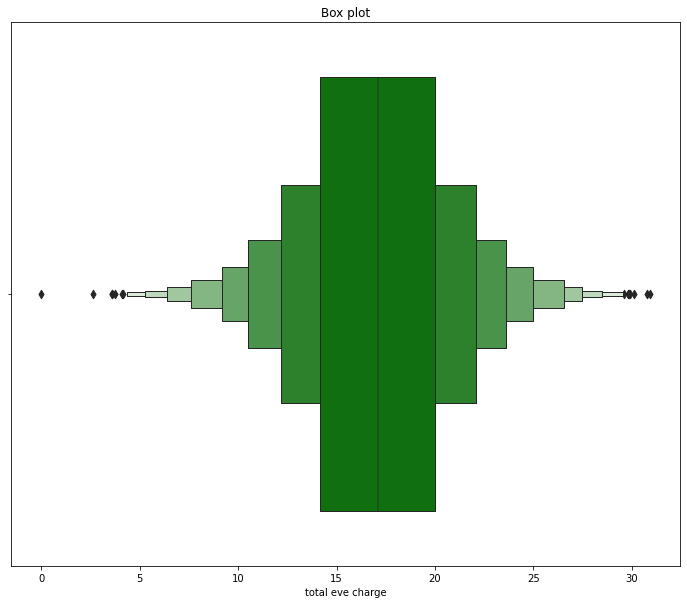

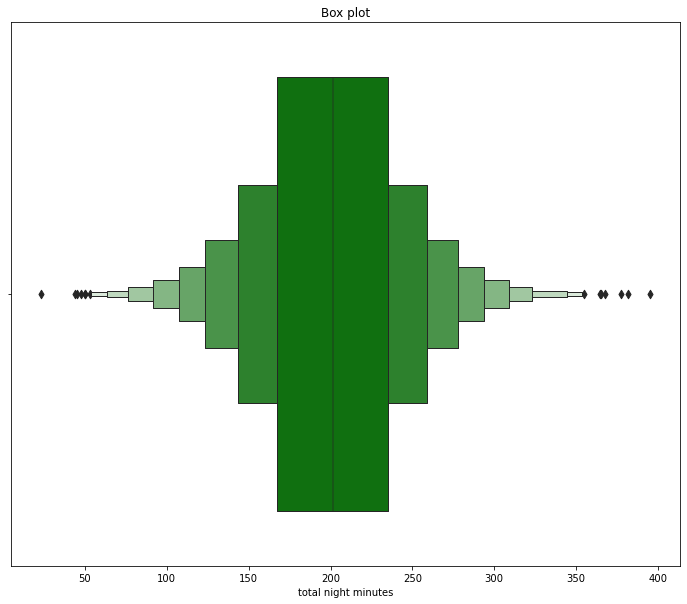

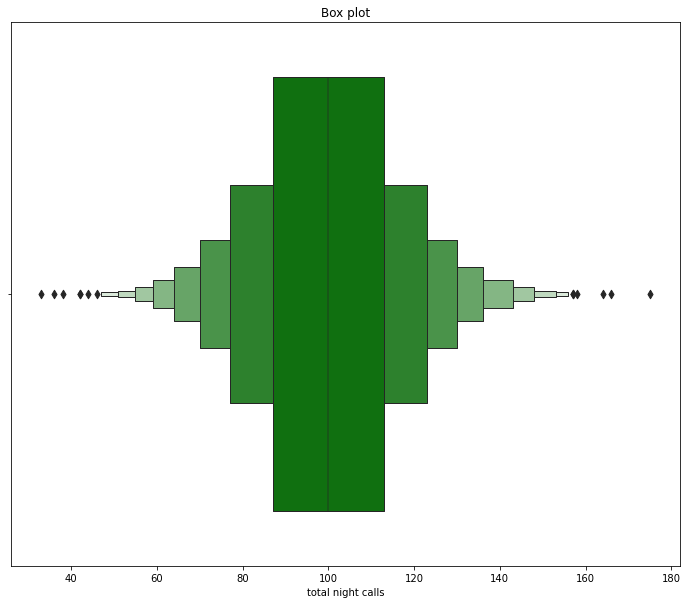

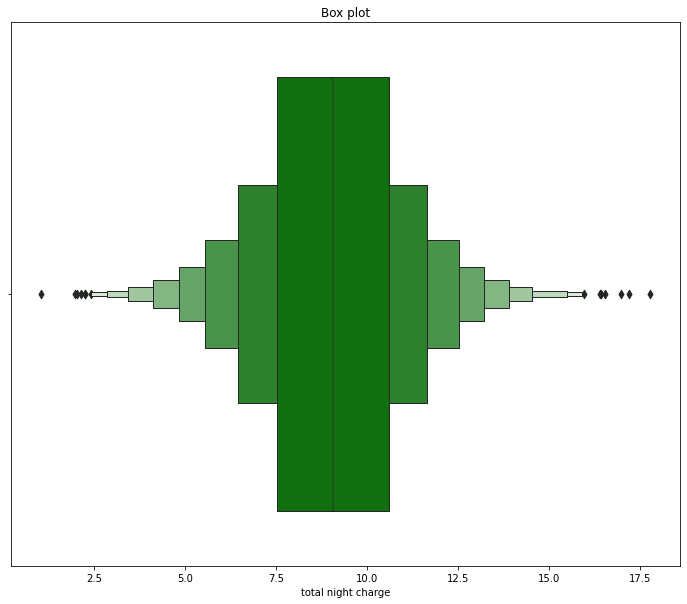

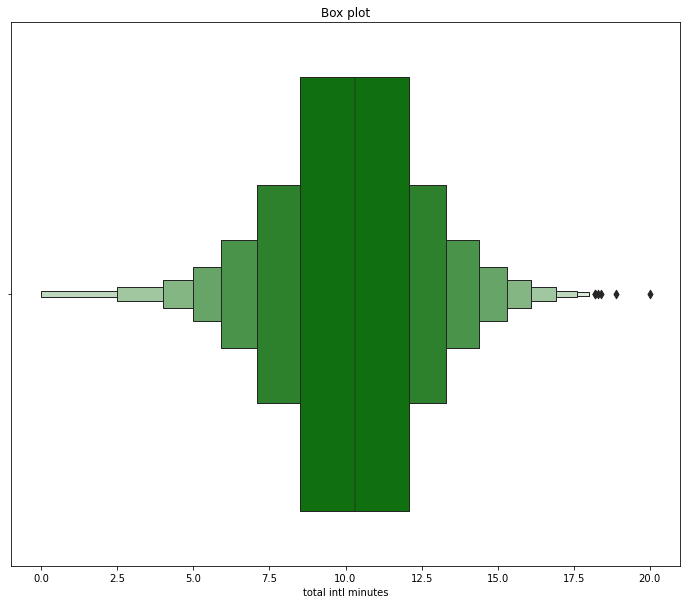

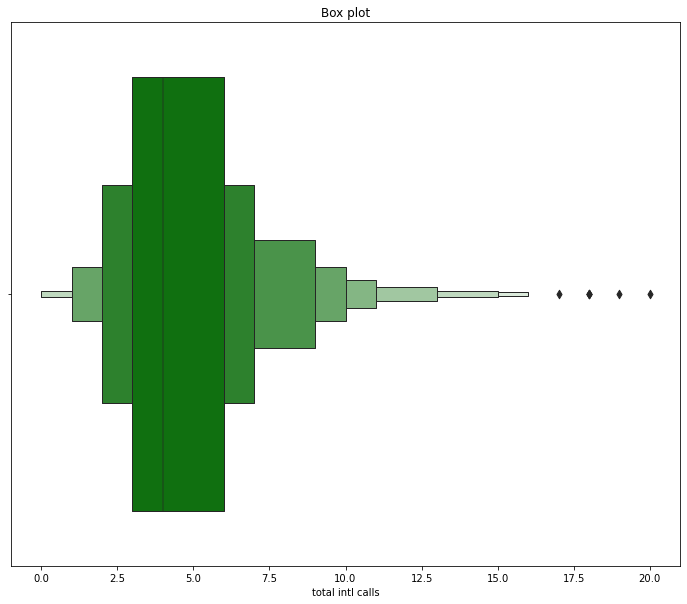

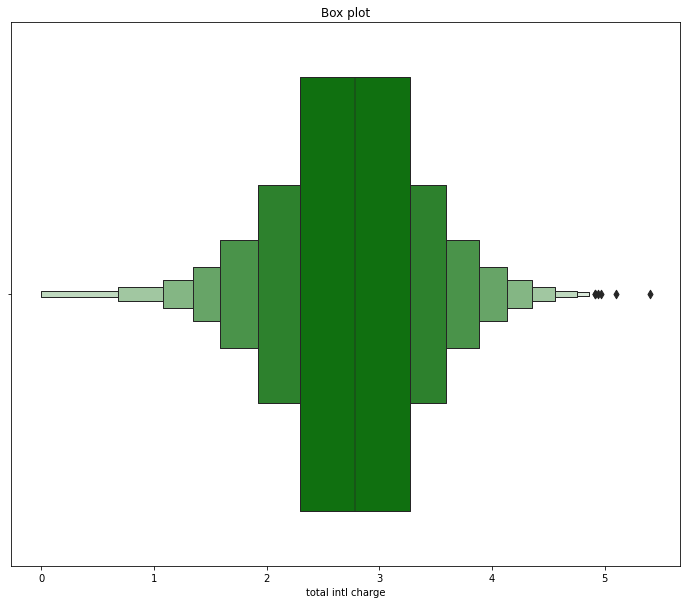

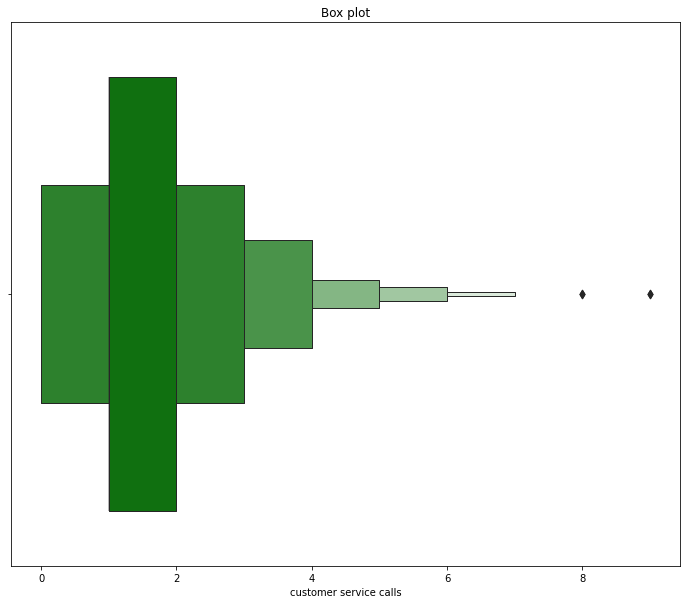

In [28]:
# creating boxplots to investigate outliers in the dataset

# creating a list of columns with numeric values
numeric_cols = df_copy.select_dtypes('number').columns

# a for loop that plots boxen plots for each of the columns

for col in numeric_cols:
    plt.figure(figsize=(12,10))
    sns.boxenplot(x = df_copy[col],color='green')
    plt.title('Box plot')
    plt.show()

From the boxenplots, it seems as though the are only a **few outliers** for each of the columns. However, there is **no peculiar case of extreme outliers which may warrant removal from the dataset**

The decision to keep outliers is informed by the fact that discarding them may actually mean loss of meaningful information. Furthermore, the outliers do not seem to be extreme to have a huge affect on the performance of the model.

## External data validation

According to Pew Research Center in a report titled *Cell phones and American adults*,https://www.pewresearch.org/internet/2010/09/02/cell-phones-and-american-adults/ the average american has a minimum of 2 night charges and a maximun of 18 night charges. This is inline with our dataset which reports a minimum of 1 and a maximum of 17.

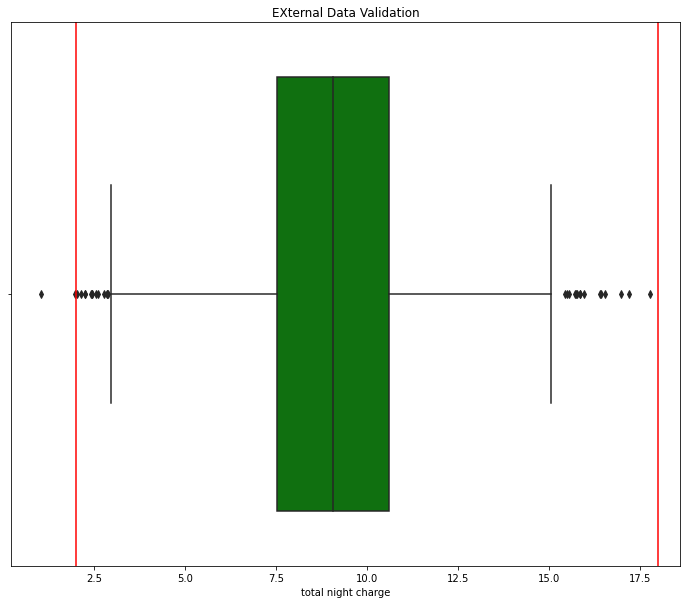

In [29]:
# a boxplot showing the distribution of total charges and the reported min and max as per Pew Research Center

plt.figure(figsize = (12, 10))
sns.boxplot(x="total night charge", data= df_copy, color= 'green')
plt.axvline(x = 2, color ="red")
plt.axvline(x=18, color ="red")
plt.title('EXternal Data Validation');

## Exploratory Data Analysis 

### 1. Univariate Analysis 

#### 1.(a) Distribution of continous variables 

In [30]:
# creating dataframe with continous variables only

continous_vars = df_copy.select_dtypes('number')

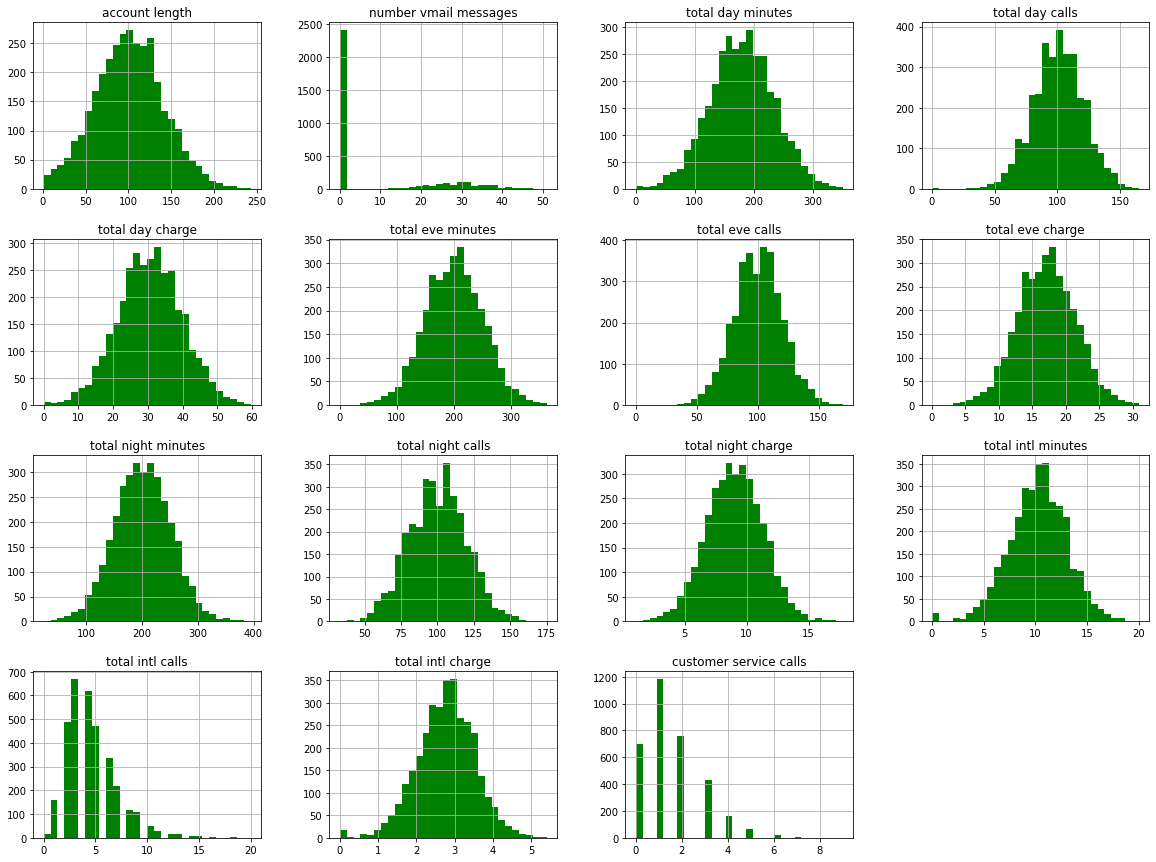

In [31]:
# creating histograms for each of the columns in the dataset

continous_vars.hist(bins=30, figsize=(20, 15), color ='green');

> From the histograms, all our continous variables seem to **have reasonable normal distributions** which will be good for modelling purposes 

#### 1.(b) Churn count

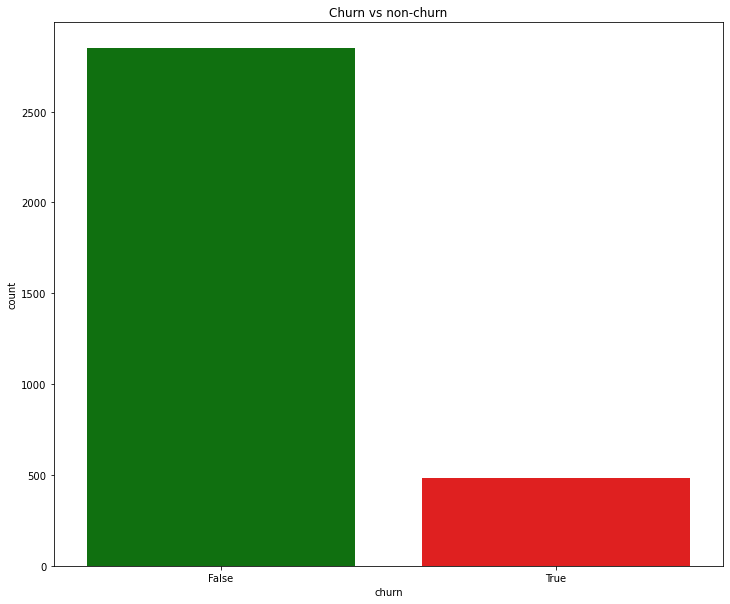

In [32]:
# Creating a countplot of churn vs non-churn

plt.figure(figsize= (12,10))
sns.countplot(x='churn', data= df_copy, palette=['g', 'r'])
plt.title('Churn vs non-churn');

From the following countplot, it is clear customers who do not churn **(86%)** are more than those who churn **(14%)**. This is an expected situation as many customers are expected to not churn and only a few to churn. This been the target variable that will be predicted by the machine learning model, an imbalanced dataset presents the following challenges:

&#9677; Biased Model Performance: Models trained on imbalanced data can exhibit high accuracy, but this may not be a good indicator of their actual performance as they might have a bias towards the majority class.

&#9677; Overfitting on Majority Class: Models can easily overfit to the majority class and ignore the minority class, leading to poor performance on the minority class.

&#9677; Inadequate Representation of Minority Class: With imbalanced data, the model may not see enough examples of the minority class, leading to under-representation and misclassification.

&#9677; Difficulty in Evaluation: Evaluation metrics such as accuracy can be misleading in imbalanced datasets.

#### 1(c) Which region has the highest number of customers 

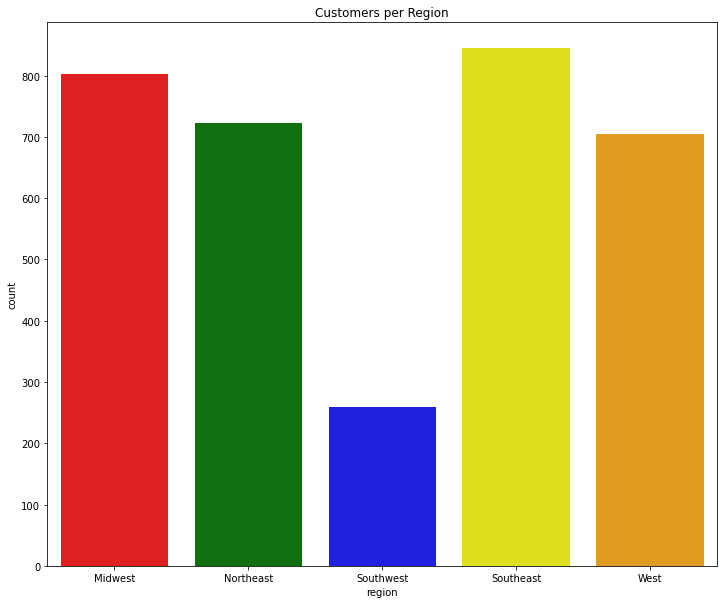

In [33]:
# countplot of regions 

plt.figure(figsize= (12,10))
sns.countplot(x='region', data= df_copy, palette=['red','green','blue','yellow','orange'])
plt.title('Customers per Region');

It seems like most of regions have customer numbers above 700 except for the Southwest region which has less than three hundred customer. However, it is expected as there are only a few states that make up that region

### 2. Bivariate Analysis

#### 2(a) Which region has the highest churn rate 

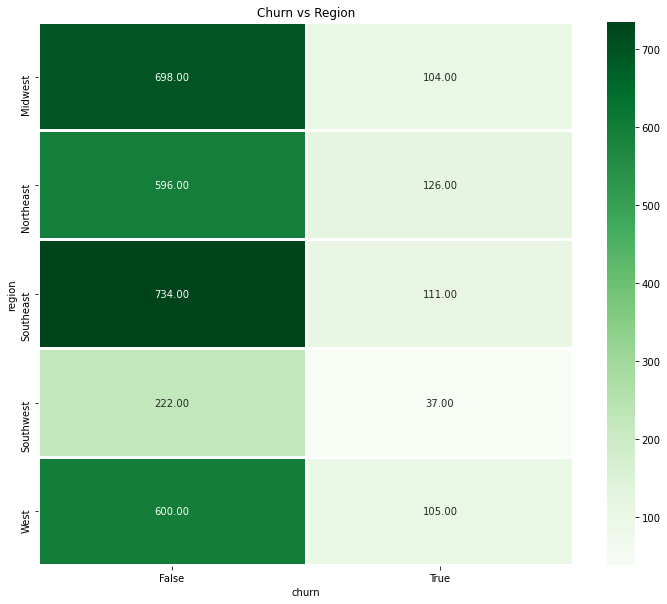

In [34]:
# heatmap of region vs churn 

plt.figure(figsize=(12,10))
counts = df_copy.groupby(['region', 'churn']).size().reset_index(name='counts')
pivot = counts.pivot("region", "churn", "counts")
sns.heatmap(pivot, annot=True, cmap="Greens", linewidths=2, fmt=".2f")
plt.title("Churn vs Region");


Of particular interest from the above plot is the Northeast region which has the highest churn rate. On the other hand, the the Southeast and Midwest regions have relatively low churn rates 

#### 2(b) Does international plan has some sort of relationship with churning 

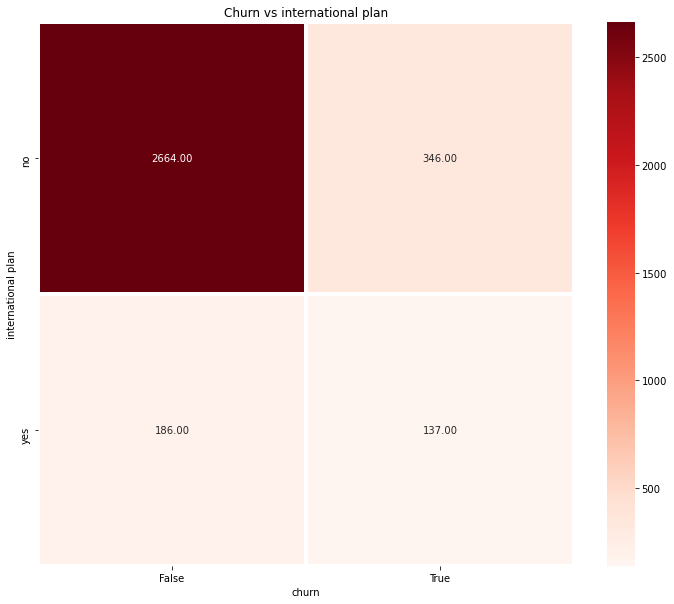

In [35]:
# a heatmap of churn vs international plan

plt.figure(figsize=(12,10))
counts = df_copy.groupby(['international plan', 'churn']).size().reset_index(name='counts')
pivot = counts.pivot("international plan", "churn", "counts")
sns.heatmap(pivot, annot=True, cmap="Reds",linewidths=2.5, fmt=".2f")
plt.title("Churn vs international plan");


From the heatmap, it evident that **people who do not have an international plan are twice likely to churn that people who have an international plan**

#### 2(c) Does voice mail plan has some sort of relationship with churning 

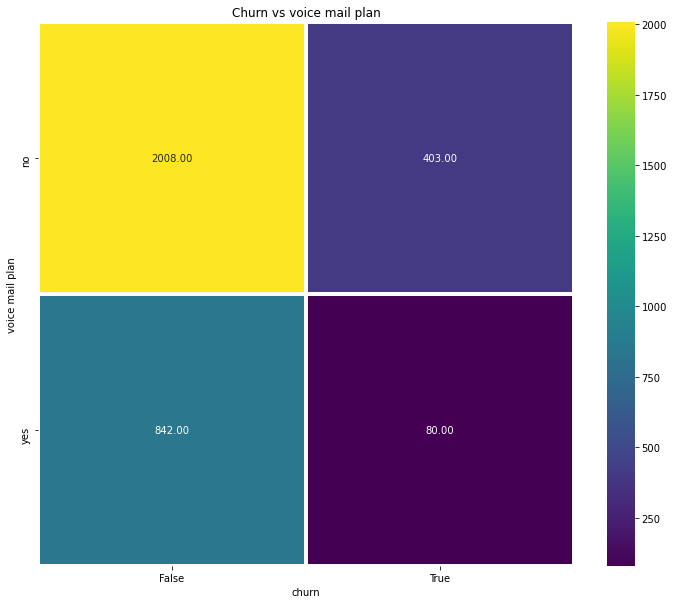

In [36]:
# a heatmap of churn vs voice mail plan

plt.figure(figsize=(12,10))
counts = df_copy.groupby(['voice mail plan', 'churn']).size().reset_index(name='counts')
pivot = counts.pivot("voice mail plan", "churn", "counts")
sns.heatmap(pivot, annot=True, cmap="viridis",linewidths=2.5, fmt=".2f")
plt.title("Churn vs voice mail plan");


It is clearly depicted from the heatmap that **customers who do not have a voicemail  are five times likely to churn that people who have a voicemail plan**

#### 2 (d) what is the relationship between average customer service call for Churning and Non-churning customers

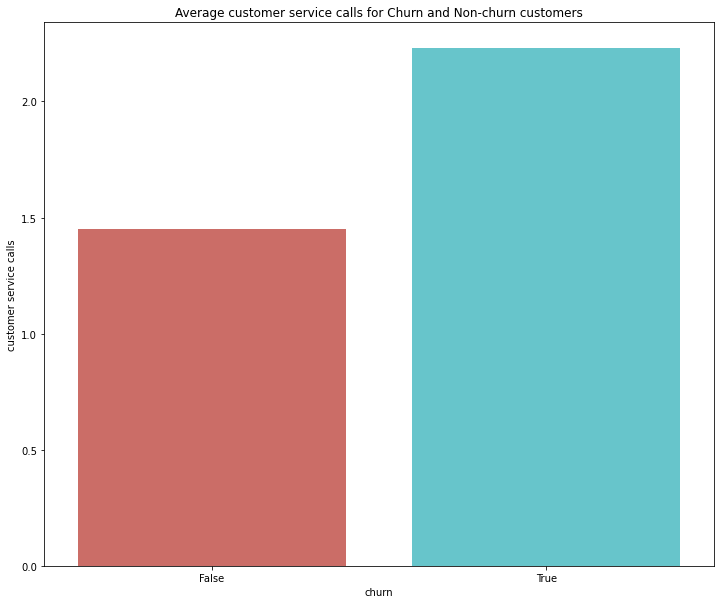

In [37]:
# a barplot showing average customer service calls for churn 

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='customer service calls' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Average customer service calls for Churn and Non-churn customers');

The barplot above shows that customers are likely to churn if they make more than 2 customer service calls. This is an indication that customers are more likely to churn if they do not feel like they are getting customer service.  

#### 2 (e) Total day minutes for Churning and Non-churning customers

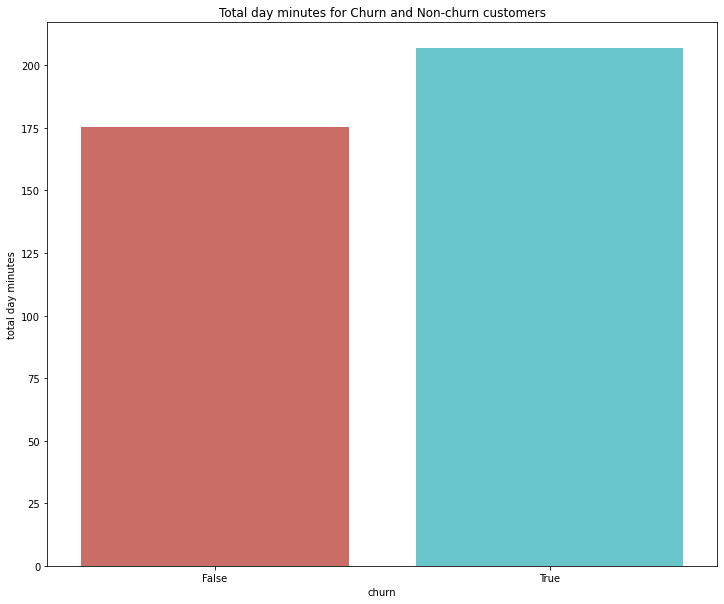

In [38]:
# a barplot showing average customer service calls for churn 

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='total day minutes' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Total day minutes for Churn and Non-churn customers');

It seems as though churning customers have a slightly higher total day minutes that non-churning customers

#### 2 (f) Total day charge minutes for Churning and Non-churning customers

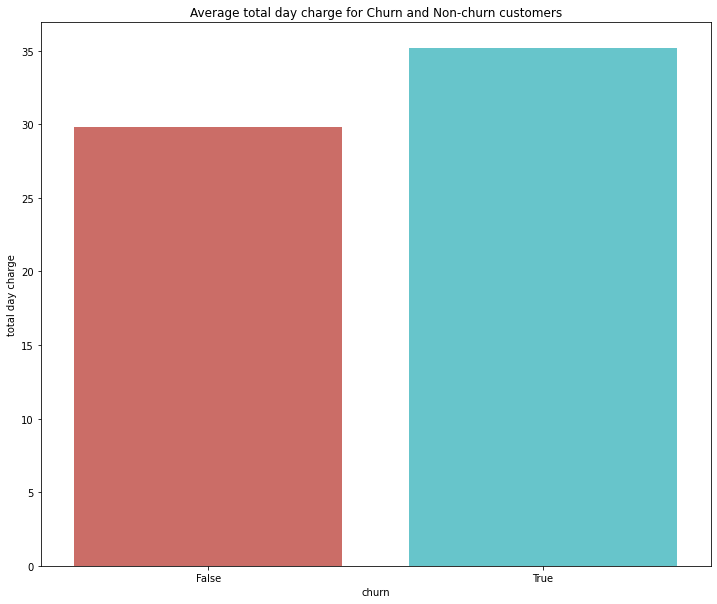

In [39]:
# plotting a barplot for total day charge  

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='total day charge' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Average total day charge for Churn and Non-churn customers');

From the barplot, it seems as though that there is no significant differences between total evening minutes for churning and non-churning customers

#### 2 (g) Total night minutes for Churning and Non-churning customers

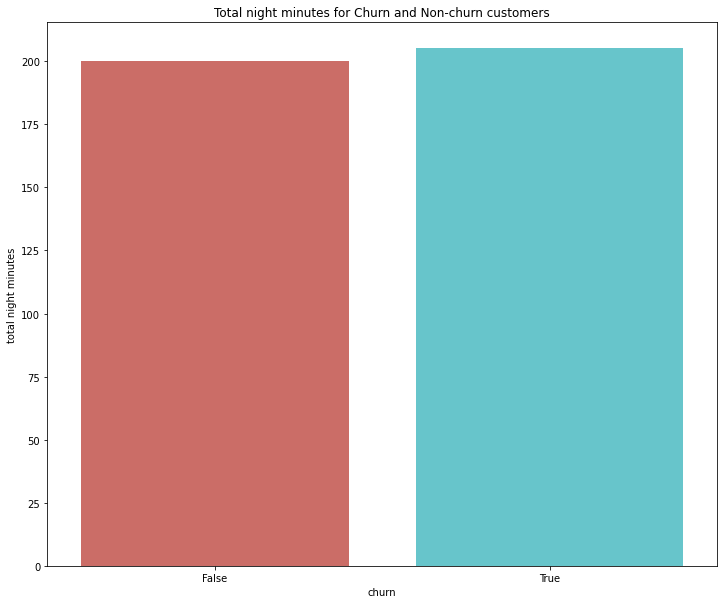

In [40]:
# plotting a bar plot total night minutes 

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='total night minutes' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Total night minutes for Churn and Non-churn customers');

The barplot shows that there is no major difference between the average total night minutes for churning and non-churning customers

#### 2 (h) Total day calls for Churning and Non-churning customers

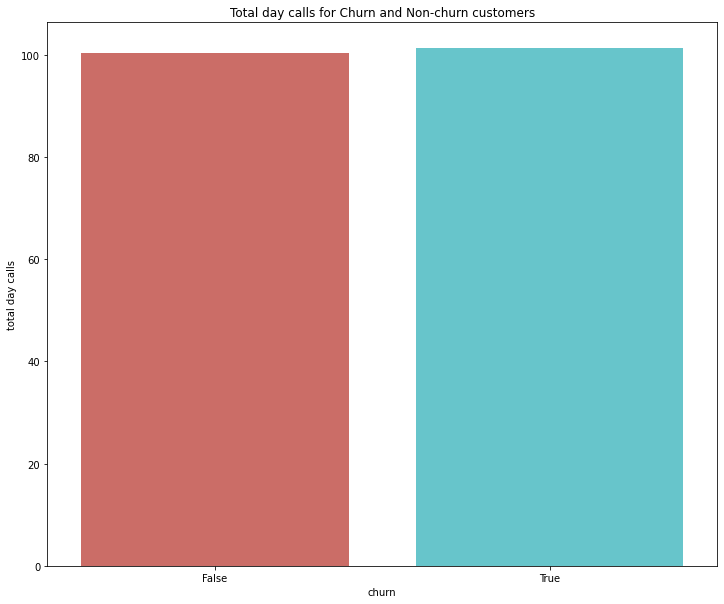

In [41]:
# plotting a barplot for total day calls 

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='total day calls' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Total day calls for Churn and Non-churn customers');

Similarly, the barplot shows that average total day calls for churning and non-churning customers is almost the same

#### 2 (i) Total night calls for Churning and Non-churning customers

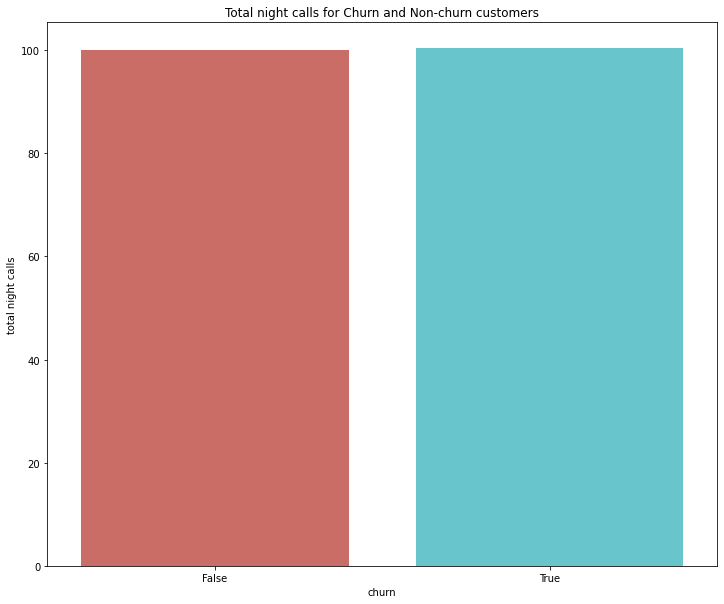

In [42]:
# plotting a barplot for night calls 

plt.figure(figsize =(12,10))
sns.barplot(x='churn', y='total night calls' , data= df_copy, color = 'blue', palette = 'hls', ci=None)
plt.title('Total night calls for Churn and Non-churn customers');

It is evident from the barplot that total night calls for churning and non-churning customers are almost indistinguishable

---

<font size="5"> DATA PREPARATION </font>

---

First thing first, the column **phone number** will be **dropped**. This is because personal identifiers, such as phone numbers, often cause overfitting in machine learning models because they are unique and constant features, which can **lead to memorization of the training data rather than generalization**. This can result in **poor performance on unseen data, as the model has simply memorized the specific training examples instead of learning patterns or relationships in the data**. Additionally, personal identifiers are often irrelevant to the target variable and including them in the model can introduce noise, reducing the overall accuracy of the model.

In [43]:
# as it can be seen each phone number each phone is unique for each and every customer

df_copy['phone number'].nunique() 

3333

In [44]:
# Dropping the phone number column from the dataset 

df_copy.drop('phone number', axis=1, inplace= True)

### Data preprocessing 

##### Dealing with categorical variables 

In [45]:
# dealing with categorical variables 

categories = ['international plan','voice mail plan','cat_area_code','region','churn']

df_cats = df_copy[categories]
df_categorical = pd.get_dummies(df_cats, columns= categories, drop_first=True, dtype=float)

all_cols = df_copy.columns.to_list()

not_in_cats = list(set(all_cols) - set(categories))
df_numeric = df_copy[not_in_cats]
df_copy_2 = pd.concat([df_numeric, df_categorical], axis=1)

# rename the name of the column 

df_copy_2.rename(columns={'churn_True': 'churn'}, inplace=True)


##### Defining predictor and target variables 

In [46]:
X = df_copy_2.drop('churn', axis= 1)
y = df_copy_2['churn']

##### Performing a train and test split 

In [47]:
# train and test split with the test data comprosing of 20% of the initial data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

##### Normalizing numeric features

In [54]:
# normalizing numeric features in the dataset 

X_train_numeric = X_train[not_in_cats]
X_train_numeric



scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_numeric),index=X_train_numeric.index,
                              columns=X_train_numeric.columns)

In [55]:
# concatenating datasets 

cat_cols = ['cat_area_code_415','cat_area_code_510','region_Northeast','region_Southeast',
            'region_Southwest','region_West','international plan_yes','voice mail plan_yes'
            ]
X_train_categorical = X_train[cat_cols]
X_train_complete = pd.concat([X_train_scaled,X_train_categorical], axis=1)
X_train_complete.head()

,customer service calls,total day minutes,total day charge,total intl charge,total night minutes,total intl minutes,total eve calls,total intl calls,number vmail messages,total eve minutes,...,account length,total night charge,cat_area_code_415,cat_area_code_510,region_Northeast,region_Southeast,region_Southwest,region_West,international plan_yes,voice mail plan_yes
1680,0.222222,0.554447,0.554494,0.635185,0.417160,0.635,0.753165,0.05,0.000000,0.469147,...,0.438017,0.417215,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
81,0.333333,0.614025,0.614017,0.629630,0.686659,0.630,0.424051,0.25,0.000000,0.525106,...,0.475207,0.686790,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
151,0.111111,0.293044,0.293092,0.505556,0.741797,0.505,0.500000,0.35,0.000000,0.530853,...,0.479339,0.742379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,0.111111,0.459236,0.459256,0.529630,0.551910,0.530,0.436709,0.20,0.000000,0.506957,...,0.326446,0.552301,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
790,0.000000,0.801311,0.801308,0.375926,0.191232,0.375,0.575949,0.15,0.882353,0.504537,...,0.376033,0.191273,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


##### Over-sampling the minority classs using SMOTE 

In [56]:
# oversampling the minority class using smote
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_complete, y_train)

y_train_resampled.value_counts()

1.0    2281
0.0    2281
Name: churn, dtype: int64

----

<font size="5"> MODELLING </font>

---

In coming up with the best model, the following approach will be taken:

&#9677; Fitting a baseline model( logistic regression) to act as the benchmark

&#9677; Fitting other potential models such a random forest classifier, a support vector classifier, a Adaboost classifier and a XgBoost classifier 

&#9677; Hyperparameters tuning of the two best models ( taking into account prediction accuracy and recall)

&#9677; Comparing vanilla versions of the two best models with the tuned versions of the models and selecting the best model to optimize our business problem
    

### Fitting the baseline model ( Logistic regression Model)

In [57]:
# Fitting the model on training data 

logistic = LogisticRegression()

log_model = logistic.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_model.predict(X_train_resampled)

In [60]:
# Normalizing the test 

X_test_numeric = X_test[not_in_cats]

X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric),index=X_test_numeric.index,
                              columns=X_test_numeric.columns)

In [61]:
# Concatenating the full dataset for the test set

X_test_categorical = X_test[cat_cols]
X_test_complete = pd.concat([X_test_scaled,X_test_categorical], axis=1)

In [62]:
# predicting new unseen data ( test set)

y_test_pred_log = log_model.predict(X_test_complete)


In [63]:
# Checking the classification report for the performance of the logistic regression model

print(classification_report(y_test,y_test_pred_log))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.83       569
         1.0       0.34      0.76      0.47        98

    accuracy                           0.75       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.75      0.78       667



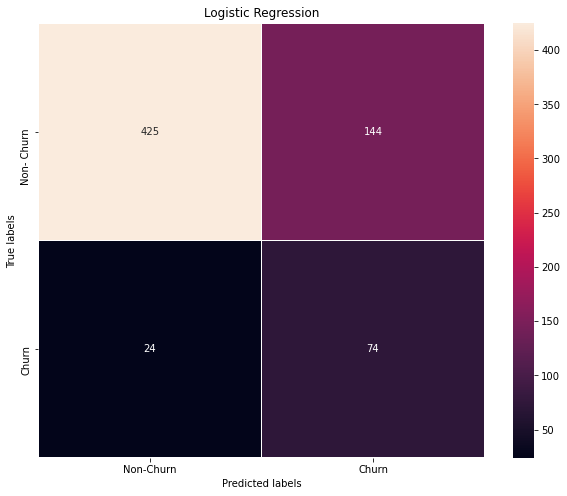

In [64]:
# plotting a confusion matrix 

confus_matrix_log= confusion_matrix(y_test, y_test_pred_log)

plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression'); 
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn']); ax.yaxis.set_ticklabels(['Non- Churn', 'Churn']);

### Fitting other potential classifiers

#### RandomForest classifier

In [65]:
# randomforest classifier vanilla model

random_clf = RandomForestClassifier()  
  
# Training the model on the training dataset

random_clf.fit(X_train_resampled, y_train_resampled)
  
# performing predictions on the test dataset
y_test_pred_rf = random_clf.predict(X_test_complete)

print(classification_report(y_test,y_test_pred_rf))


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       569
         1.0       0.77      0.80      0.78        98

    accuracy                           0.94       667
   macro avg       0.87      0.88      0.87       667
weighted avg       0.94      0.94      0.94       667



#### Support Vector Machine classifier

In [66]:
# training a vanilla support vector machine 

sv_clf = SVC(kernel='linear') 
  
# Training the model on the training dataset

sv_clf.fit(X_train_resampled, y_train_resampled)
  
# performing predictions on the test dataset
y_test_pred_sv = sv_clf.predict(X_test_complete)

print(classification_report(y_test,y_test_pred_sv))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82       569
         1.0       0.32      0.76      0.45        98

    accuracy                           0.73       667
   macro avg       0.63      0.74      0.64       667
weighted avg       0.85      0.73      0.77       667



####  Adaboost classifier

In [67]:
ada_clf = AdaBoostClassifier()
  
# Training the model on the training dataset

ada_clf.fit(X_train_resampled, y_train_resampled)
  
# performing predictions on the test dataset
y_test_pred_ada = ada_clf.predict(X_test_complete)

print(classification_report(y_test,y_test_pred_ada))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       569
         1.0       0.50      0.58      0.54        98

    accuracy                           0.85       667
   macro avg       0.72      0.74      0.73       667
weighted avg       0.86      0.85      0.86       667



#### Xgboost classifier 

In [68]:
# XgBoost classifier 

xg_clf = XGBClassifier()
  
# Training the model on the training dataset

xg_clf.fit(X_train_resampled, y_train_resampled)
  
# performing predictions on the test dataset
y_test_pred_xg = xg_clf.predict(X_test_complete)

print(classification_report(y_test,y_test_pred_xg))


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       569
         1.0       0.83      0.74      0.78        98

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667



### Model Tuning 

The best two best models will be tuned to check whether they can increase performance 

#### Tuning the random forest classifier 

In [69]:
# tuning the model with different parameters 

grid_search_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

tuned_rf = GridSearchCV(grid_search_rf, param_grid, cv=3)
tuned_rf.fit(X_train_resampled, y_train_resampled)

tuned_rf.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [70]:
# Updating parameters for the tuned model

tuned_random_clf = RandomForestClassifier(max_depth=9,
                                    max_features="sqrt",
                                    max_leaf_nodes=9,
                                    n_estimators=100)
tuned_random_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf_tuned = tuned_random_clf.predict(X_test_complete)
print(classification_report(y_test,y_pred_rf_tuned ))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.91       569
         1.0       0.49      0.81      0.61        98

    accuracy                           0.85       667
   macro avg       0.73      0.83      0.76       667
weighted avg       0.89      0.85      0.86       667



#### Tuning Xgboost classsifier

In [74]:
# tuning model with different hyperameters 

grid_search_xg = XGBClassifier()

param_grid = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'n_estimators': [100, 250, 500, 750]
              }

tuned_xg = GridSearchCV(grid_search_xg, param_grid, cv=3)
tuned_xg.fit(X_train_resampled, y_train_resampled)

tuned_xg.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 750}

In [81]:
# updating parameters for tuned xgboost model

xg_clf_tuned = XGBClassifier(max_depth=10, n_estimators = 750, learning_rate = 0.2)
  
# Training the model on the training dataset

xg_clf_tuned.fit(X_train_resampled, y_train_resampled)
  
# performing predictions on the test dataset
y_test_pred_xg_tuned = xg_clf_tuned.predict(X_test_complete)

print(classification_report(y_test,y_test_pred_xg_tuned))


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       569
         1.0       0.83      0.79      0.81        98

    accuracy                           0.94       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



---

<font size="5"> EVALUATION </font>

---

### Choosing the final model 


Although hyperparameter tuning is an important step in the machine learning process, it does not a guarantee of finding the best model. This may be due to overfitting when the model fits too closely to the training data and performs poorly on unseen data. Overfitting can occur even with optimal hyperparameters if the model is too complex for the data, so it's important to balance model complexity and performance.


Different metrics are considered when choosing a classifier in machine learning because each metric measures a different aspect of the performance of the classifier and thus provides a different perspective on its effectiveness. The choice of metric depends on the problem's characteristics and the objective of the classification task. In this case, the main objective is to capture the churning customers reasonably enough. 
The following confusion matrixes for each of the two best models **'vanilla' random forest model** and the **tuned xgboost classifier** summarize the performance of the models on **unseen data**.

>> In this case, **capturing churning customers** is of great importance as losing customers equits to losing business. **The model with the highest recall and prediction accuracy score will be chosen as the final model** as it will optimize the business problem

#### Vanilla Random Forest Model

In [78]:
# perfomance metrics for the model on the test data 

print(f"Accuracy:" ,accuracy_score(y_test, y_test_pred_rf))
print(f"Precision:" ,precision_score(y_test, y_test_pred_rf))
print(f"Recall:", recall_score(y_test, y_test_pred_rf))
print(f"f1_score:", f1_score(y_test, y_test_pred_rf))

Accuracy: 0.9355322338830585
Precision: 0.7722772277227723
Recall: 0.7959183673469388
f1_score: 0.7839195979899498


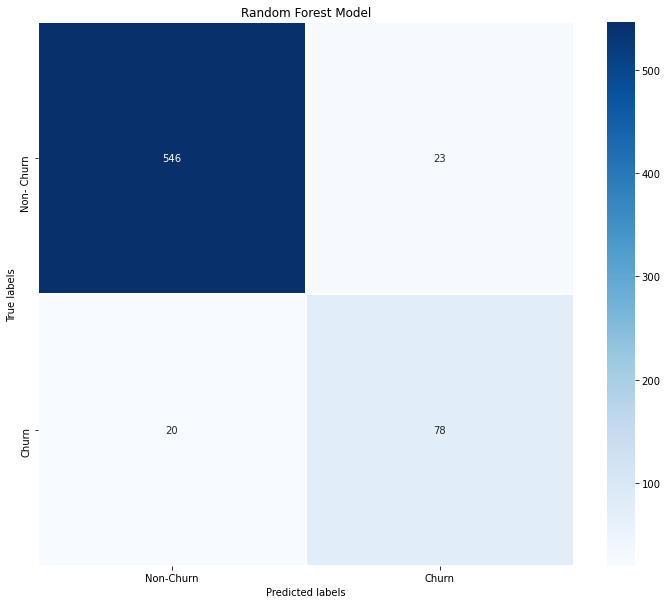

In [80]:
# confusion matrix for the model 

confus_matrix_rf= confusion_matrix(y_test, y_test_pred_rf )

plt.figure(figsize= (12,10))
ax= plt.subplot()
sns.heatmap(confus_matrix_rf , annot=True, fmt='g', ax=ax, linewidth =0.2, cmap='Blues');  
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Model'); 
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn']); ax.yaxis.set_ticklabels(['Non- Churn', 'Churn']);

#### Tuned XgBoost Classifier

In [83]:
# perfomance metrics for the model on the test data 

print(f"Accuracy:" ,accuracy_score(y_test, y_test_pred_xg_tuned))
print(f"Precision:" ,precision_score(y_test, y_test_pred_xg_tuned))
print(f"Recall:", recall_score(y_test, y_test_pred_xg_tuned))
print(f"f1_score:", f1_score(y_test, y_test_pred_xg_tuned))

Accuracy: 0.9445277361319341
Precision: 0.8279569892473119
Recall: 0.7857142857142857
f1_score: 0.806282722513089


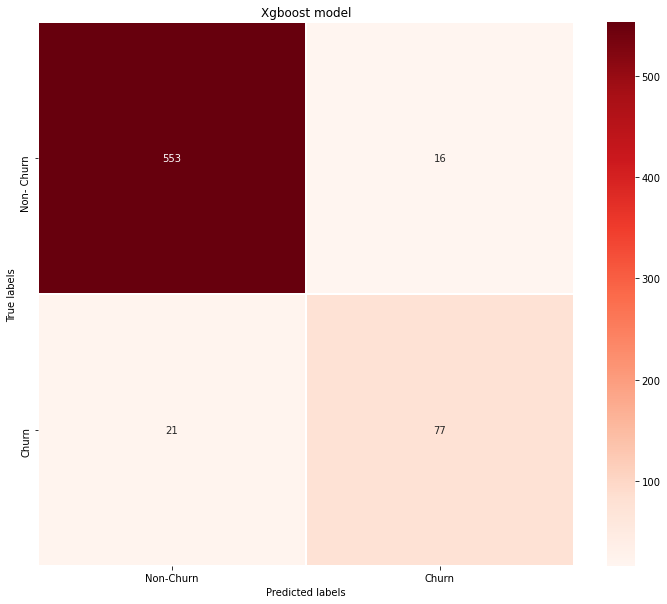

In [90]:
# confusion matrix 
confus_matrix_xg_tuned = confusion_matrix(y_test, y_test_pred_xg_tuned)

plt.figure(figsize= (12,10))
ax= plt.subplot()
sns.heatmap(confus_matrix_xg_tuned , annot=True, fmt='g', ax=ax, linewidth =0.2, cmap='Reds');  
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Xgboost model'); 
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn']); ax.yaxis.set_ticklabels(['Non- Churn', 'Churn']);

In line with the **main objective and the metric for success**, the **tuned xgBoost classifier** `xg_clf_tuned` will be selected for use as the **final model** that will be used in production. From the confusion matrix, tuned xgBoost classifiercaptures very well churning customers while at the same predicting quite well on the non-churning customer as it has a **recall of 79 % and an overall good accuracy of 94 %** . The non-tuned random forest has an **equally good recall of 80 % percent but has a slightly lower overall accuracy of 93% meaning that it will may misclassify more of the non-churn customers as churn. Additionally, the XgBoost classifier has a greater f1 score of 80% compared to the random forests f1 score of 78%**. A lower f1 score is not an ideal situation as it would mean that many non-churning customers would be flagged as churning customers leading to wastage of resources. The XgBoost classifier does a considerably good job not misclassifying non-churning customers as churning customers.

> Accuracy is defined as the proportion of correct predictions out of all predictions made. In the case of a customer churn prediction model, **accuracy would mean the proportion of customers that the model correctly predicted to either churn or not churn**.**A 94% accuracy means that the model is able to correctly predict churn or not churn for 94% of the customers in the test data**. However, accuracy is a measure of a model's overall performance and doesn't provide any insight into the individual types of errors the model is making.For example, if a model has high accuracy but is constantly predicting that a customer won't churn when they actually do, it may not be very useful in solving the problem at hand. On the other hand, **recall is a metric that measures the ability of a model to identify all relevant positive examples**. In the case of customer churn prediction, **recall would be the proportion of customers that actually churned that the model correctly predicted to churn. A recall of 79%  for the random forest model means that it correctly predicted 79% of the customers who actually churned. This is an important metric for a customer churn prediction model because it helps us understand the model's ability to identify customers who are likely to churn.**

> **accuracy gives us an overall picture of the model's performance, recall provides a more targeted understanding of the model's ability to identify customers who are likely to churn. **A high recall indicates that the model is able to identify a large proportion of the customers who are likely to churn, which is important for taking appropriate action to prevent churn.**

> There is always a **tradeoff between precision and recall.** In this case, **a model with high recall focuses more on flagging churning customers even if it means flagging non-churning customers as churning customer**. According to the business problem **it would be better to flag a non-churning customer as churning customer than miss on flagging a churning customer and losing the customer. 

# Pickling Random Forest model for use in production enviroment

In [86]:
with open('customerchurn_model.pkl', 'wb') as f:
    joblib.dump(xg_clf_tuned, f)

### Variable importance 

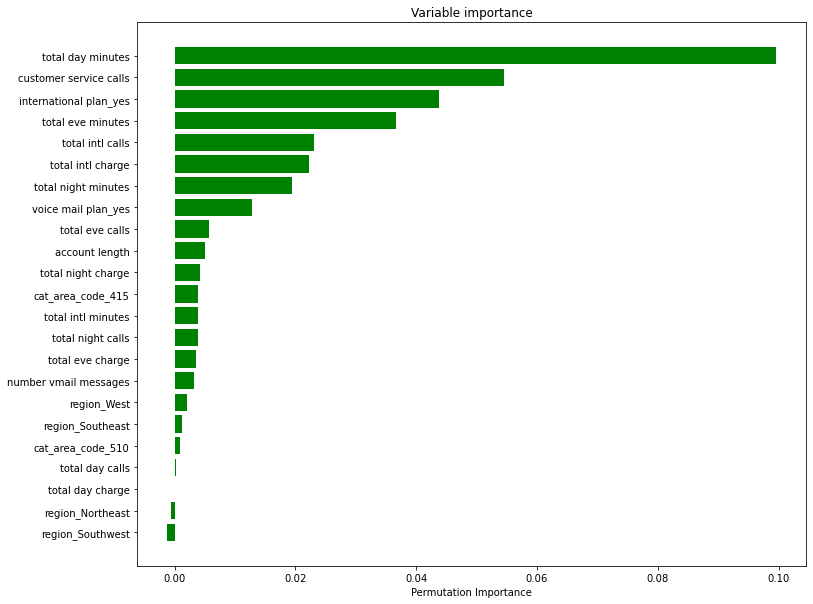

In [88]:
perm_importance = permutation_importance(xg_clf_tuned, X_test_complete, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12,10))
plt.barh(X_test_complete.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color="green")
plt.xlabel("Permutation Importance")
plt.title('Variable importance');

From the variable importance plot, it is very evident that the most important predictors of whether an customer or not include **totol day minutes, total night minutes and total eve minutes**. From the variable importance plot, it is also very evident that the another important predictor of whether an customer or not is **customer service calls**. **Customer service calls** are an important part of a business because they provide an opportunity to interact directly with customers and address their needs and concerns. This interaction can have a significant impact on the customer experience and their overall satisfaction with the company and its products or services.
Another important predictor is whether a customer has **international plan** or not. Customers who do not have international plan are more likely to churn that customers with an international plan. Today day charge is another important predictor as well as total day minutes. **Voice mail plan** is another good predictor of a persons decision to churn or not churn. It is evident from analysis that people with Voice mail plan are less likely to churn compared to people do not have a voice mail plan.

# Limitations 

As a popular machine learning says **'All models are wrong , but some are useful'**, the chosen model is not a silver bullet in correctly classifying churning and non churning customers. However, the model does a brilliant job in capturing well the churning customers. On the flip-side, making correct classifications on churning customers comes at a cost where more non-churning customers are misclassified as churning customers. This can often mean **that resources to retain may be channeled towards a non-churning customer when there is no need**.  

# Challenging  the solution 

Collecting data on about **customers age, gender could have the potential of increasing the models accuracy**.This is because such **demographic data provide rich information** that could be useful in providing the model with extra information to correctly predict whether a customer will churn or not 

# Recommendations 

&#9677; There should be more emphasis on customer service calls as they can ultimately determine if a customer will churn or not. Customer calls are important because of the following reasons.

* Customer Retention: Good customer service can improve customer satisfaction and help to retain customers. Satisfied customers are more likely to continue doing business with a company and recommend it to others.

* Problem Resolution: Customer service calls provide a way for customers to quickly and easily resolve problems or get answers to questions about products or services. This can improve customer satisfaction and reduce frustration.

* Feedback: Customer service calls can provide valuable feedback to a company about its products, services, and customer experience. This feedback can be used to improve the customer experience and make changes that benefit both the company and its customers.

* Reputation Management: Good customer service can help to build and maintain a positive reputation for a company, while poor customer service can harm its reputation and negatively impact its brand.

&#9677; There should also be a strong emphasis on marketing and pricing to ensure that customers can opt into international plan as there is evidence that customers who have international are less likely to churn compared to those who do not have such a plan

&#9677; Review of marketing and pricing strategies to have more customers opt into the voice mail plan could also have the potential ensuring that a customer does not churn quickly as customers who do not have a voicemail  are five times likely to churn than people who have a voicemail plan

&#9677; Review of marketing and pricing policies to ensure that customers enjoy favourable offers when making calls 

&#9677; Consideration of collecting more demographic data on customers such as age and gender as it would provide extra information that the predictive model can use in identifying if a customer will churn or not 